## Pandas and Visualization Homework with IMDb data
#### Due Monday December 21, 2014
#### Judy Yang

#### Part 1

In [119]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats, integrate
sns.set(color_codes=True)

In [120]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

read in 'imdb_1000.csv' and store it in a DataFrame named movies

In [121]:
imdb = pd.read_csv("../data/imdb_1000.csv", header=0,  na_filter=False)

check the number of rows and columns

In [122]:
imdb.shape
#979 rows, 6 columns

(979, 6)

check the data type of each column

In [123]:
#Q: loop each column?
type(imdb.title)

pandas.core.series.Series

calculate the average movie duration

In [124]:
imdb.duration.mean()

120.97957099080695

sort the DataFrame by duration to find the shortest and longest movies

In [125]:
imdb.sort_index(by=['duration'], ascending=[False]).head(1)
#longest is Hamlet
imdb.sort_index(by=['duration'], ascending=[True]).head(1)
#shortest is Freaks


/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,star_rating,title,content_rating,genre,duration,actors_list
389,8,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


create a histogram of duration


(array([  25.,  168.,  301.,  259.,  111.,   66.,   27.,   14.,    5.,    3.]),
 array([  64. ,   81.8,   99.6,  117.4,  135.2,  153. ,  170.8,  188.6,
         206.4,  224.2,  242. ]),
 <a list of 10 Patch objects>)

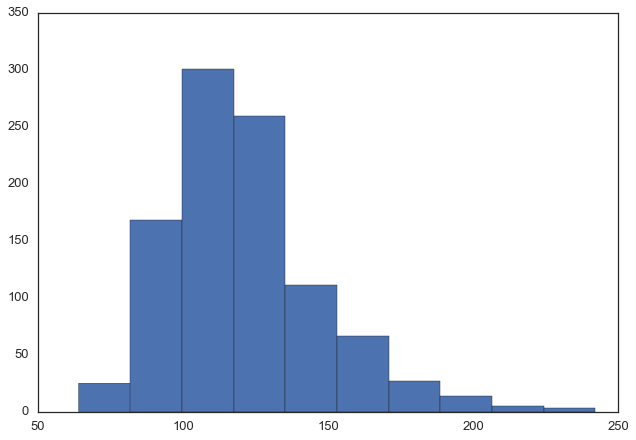

In [126]:
plt.hist(imdb.duration)

use a box plot to display that same data

{'boxes': [<matplotlib.lines.Line2D at 0x1210212d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12102f150>,
 'fliers': [<matplotlib.lines.Line2D at 0x12103a450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12102fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x121021410>,
  <matplotlib.lines.Line2D at 0x121021ad0>]}

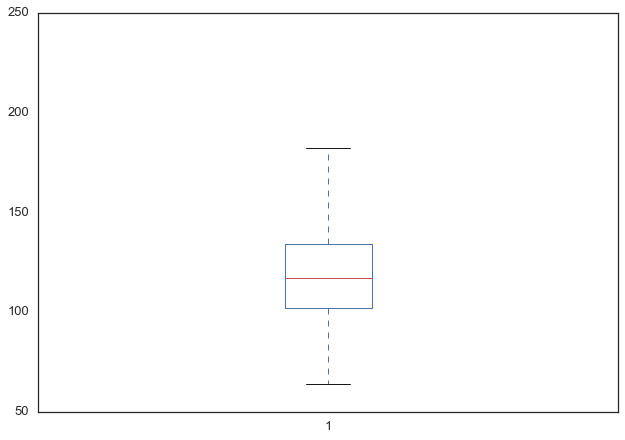

In [127]:
plt.boxplot(imdb.duration)

#### Part 2

count how many movies have each of the content ratings

In [128]:
imdb.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
               3
TV-MA          1
Name: content_rating, dtype: int64

use a visualization to display that same data, including a title and x and y labels

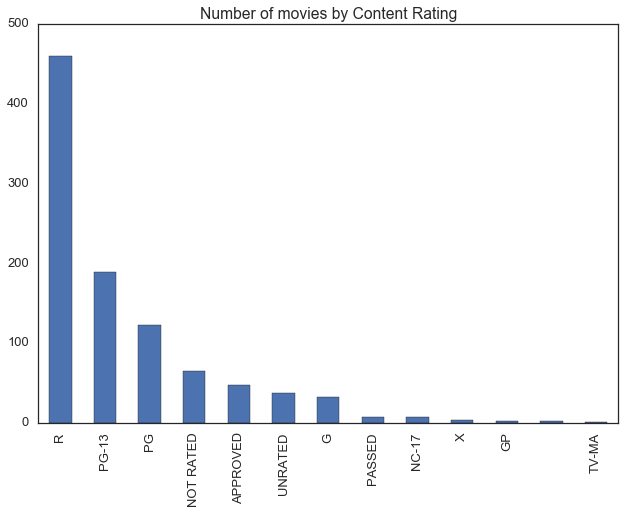

In [135]:
#need to add title
imdb.content_rating.value_counts().plot(kind="bar")
plt.title("Number of movies by Content Rating")

convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP

In [136]:
imdb['content_rating']=imdb['content_rating'].str.replace('NOT RATED' ,'UNRATED')
imdb['content_rating']=imdb['content_rating'].str.replace('APPROVED' ,'UNRATED')
imdb['content_rating']=imdb['content_rating'].str.replace('PASSED' ,'UNRATED')
imdb['content_rating']=imdb['content_rating'].str.replace('GP' ,'UNRATED')

imdb.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
             3
TV-MA        1
Name: content_rating, dtype: int64

convert the following content ratings to "NC-17": X, TV-MA

In [137]:
#Q: How to do multiple changes at once?
imdb['content_rating']=imdb['content_rating'].str.replace('X','NC-17')
imdb['content_rating']=imdb['content_rating'].str.replace('TV-MA','NC-17')
imdb.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
             3
Name: content_rating, dtype: int64

count the number of missing values in each column

In [138]:
#Q: how to count string missing?
imdb.isnull().sum()      

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

if there are missing values: examine them, then fill them in with "reasonable" values

In [ ]:
# line 138 says there aren't, but it looks like there should be 3 missing from the content_rating column?

calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours

In [139]:
imdb[imdb.duration>120].duration.mean()

143.38532110091742

In [140]:
imdb[imdb.duration<120].duration.mean()

102.40571428571428

In [ ]:
#Q:how to do t-test to see if the means are different?

use a visualization to detect whether there is a relationship between duration and star rating

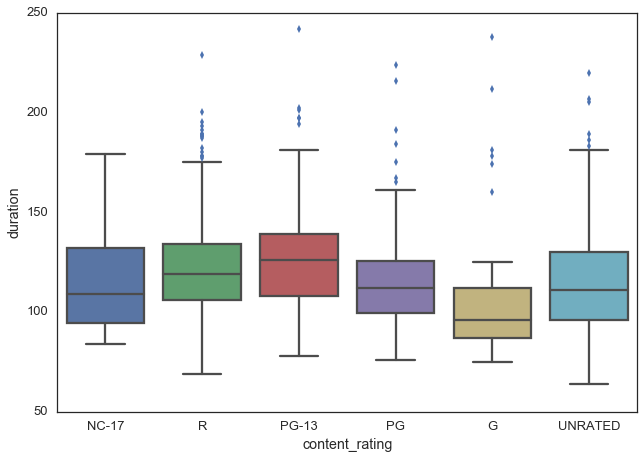

In [145]:
sns.boxplot(x="content_rating",y="duration",data=imdb, order=('NC-17', 'R', 'PG-13', 'PG', 'G', 'UNRATED'))
#among movies that are rated, it appears that adult movies have higher star ratings

calculate the average duration for each genre

In [148]:
imdb.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

#### Part 3

visualize the relationship between content rating and duration


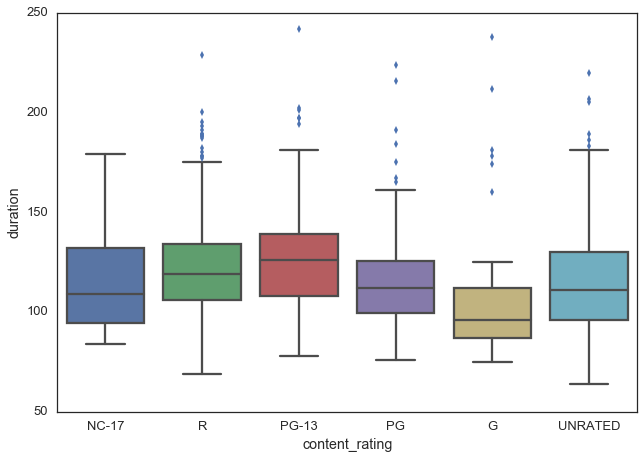

In [150]:
sns.boxplot(x="content_rating",y="duration",data=imdb, order=('NC-17', 'R', 'PG-13', 'PG', 'G', 'UNRATED'))

determine the top rated movie (by star rating) for each genre


In [155]:
print imdb.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64


In [156]:
imdb.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [178]:
#Q: how to do a loop on genre, and print just the title?
'''
Action      
Adventure    
Animation     
Biography    
Comedy      
Crime        
Drama        
Family       
Fantasy      
Film-Noir    
History      
Horror       
Mystery      
Sci-Fi       
Thriller     
Western      
'''

top_titles=[]

#for g in imdb.genre:

top_titles.append(imdb[imdb.genre=="Action"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Adventure"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Biography"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Comedy"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Crime"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Drama"].sort("star_rating", ascending=True).head(1))
top_titles.append(imdb[imdb.genre=="Family"].sort("star_rating", ascending=True).head(1))

top_titles

/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/judyyang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3

[     star_rating                                            title  \
 976          7.4  Master and Commander: The Far Side of the World   
 
     content_rating   genre  duration  \
 976          PG-13  Action       138   
 
                                            actors_list  
 976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  ,
      star_rating                        title content_rating      genre  \
 975          7.4  Back to the Future Part III             PG  Adventure   
 
      duration                                        actors_list  
 975       118  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  ,
      star_rating    title content_rating      genre  duration  \
 964          7.4  Lincoln          PG-13  Biography       150   
 
                                            actors_list  
 964  [u'Daniel Day-Lewis', u'Sally Field', u'David ...  ,
      star_rating    title content_rating   genre  duration  \
 974          7.4  Tootsie             PG  Comedy   

check if there are multiple movies with the same title, and if so, determine if they are actually duplicates


In [87]:
#check for duplicates
imdb.set_index('title').index.get_duplicates()
#four duplicate titles
dup=imdb.set_index('title').index.get_duplicates()
dup

['Dracula', 'Les Miserables', 'The Girl with the Dragon Tattoo', 'True Grit']

In [163]:
#check if actual duplicates
print imdb[(imdb.title=='Dracula') | (imdb.title=='Les Miserables')| (imdb.title=='The Girl with the Dragon Tattoo') | (imdb.title=='True Grit')]
#Q: how to do a loop , not sure why this doesn't work
#for d in dup:
#    print imdb[imdb.title=='d']

     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
703          7.6                          Dracula        UNRATED     Horror   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit                 Adventure   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
678       158  [u'Hu

In [98]:
'''
counts = imdb.groupby('title').size()
counts
type(counts)
df2 = pd.DataFrame(counts, columns = ['title'])
df2.head()

#how to merge without index and then keep if dups>1?
imdb['dups']=counts
imdb.head()
#imdb[imdb.dups>1]
''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-98-ad9484d3b93d>, line 12)

calculate the average star rating for each genre, but only include genres with at least 10 movies


In [96]:
#count number of movies per genre, keep if counts>10, take average
imdb.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [168]:
#how to limit to genres with 10+ movies?
imdb.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

Figure out something "interesting" using the actors data!

In [171]:
imdb.actors_list
type(imdb.actors_list)

pandas.core.series.Series

In [ ]:
#Calculate the number of actors per movie, and then average by genre or content_rating




